<a href="https://colab.research.google.com/github/amthreeh/healthnutrition/blob/main/healthnutrition__relation_insight_%EC%9E%84%EC%A7%80%EC%9A%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [4]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [5]:
df = pd.read_csv('/content/drive/MyDrive/nationalhealth-main/nationalhealth_2010to2021.csv')
df.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.columns.tolist()

['ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 '

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35629 entries, 0 to 35628
Columns: 122 entries, ID to 우울증
dtypes: float64(120), object(2)
memory usage: 33.2+ MB


ID            0
ID_fam        0
year          0
region        0
town_t        0
sex           0
age           0
incm          0
ho_incm       0
incm5         0
ho_incm5      0
edu           0
occp          0
cfam          0
genertn       0
allownc       0
marri_1       0
marri_2       0
fam_rela      0
tins          0
D_1_1         0
educ          0
EC1_1         0
EC_wht_23     0
EC_wht_5      0
EC_pedu_1     0
EC_pedu_2     0
BD1_11        0
BD2_1         0
BD2_31        0
dr_month      0
BP6_10        0
BP7           0
mh_stress     0
BS3_1         0
BE3_31        0
BE5_1         0
LW_mt         0
LW_mt_a1      0
LW_br         0
HE_fst        0
HE_HPdr       0
HE_DMdr       0
HE_mens       0
HE_prg        0
HE_HPfh1      0
HE_HPfh2      0
HE_HPfh3      0
HE_HLfh1      0
HE_HLfh2      0
HE_HLfh3      0
HE_IHDfh1     0
HE_IHDfh2     0
HE_IHDfh3     0
HE_STRfh1     0
HE_STRfh2     0
HE_STRfh3     0
HE_DMfh1      0
HE_DMfh2      0
HE_DMfh3      0
HE_rPLS       0
HE_sbp        0
HE_dbp  

In [9]:
df.columns

Index(['ID', 'ID_fam', 'year', 'region', 'town_t', 'sex', 'age', 'incm',
       'ho_incm', 'incm5',
       ...
       '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식',
       '아토피피부염', '골관절염', '우울증'],
      dtype='object', length=122)

# 변수정리

In [10]:
# #EC 직업과 관련된 문항
# job_check = df['EC1_1','EC_wht_23','EC_wht_5','EC_pedu_1','EC_pedu_2']
# #BD 음주와 흡연과 관련된 
# drunk_check = df['BD1_11','BD2_1','BD2_31','dr_month','BS3_1']
# #BP 정신적 스트레스와 관련된 문항
# mental_stress = df['BP6_10','BP7','mh_stress']
# #BE 신체적 활동(운동)과 관련된 문항
# exercise = df['BE3_31','BE5_1']
# #LW 출산 여부와 관련된 문항
# childbirth_check = df['LW_mt','LW_mt_a1','LW_br']
# # # 개인아이디 가구아이디 조사연도 17개시도 동/읍면구분 성별 나이 소득분위 교육수준 
# # # incm과 관련된문항 소득분위
# # income_check = 
# # # HE와 관련된문항  #건강검진부분
# # phisical_check = 
# # #N과관련된 문항 #1일 영양소섭취와 관련된문항
# # nutrient_intake = 
# # #EC와 경제수준과 관련된문항


##'연도 변화에 따른 신체/질병 특성의 변화'

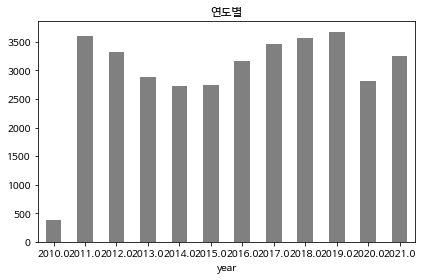

In [11]:
s = df.groupby('year').size()

s.plot(color='grey', kind='bar', rot=0)
plt.title("연도별")
plt.tight_layout()

가장 많은 연도: 2019, 2011    
가장 적은 연도: 2014, 2015

In [12]:
df.groupby('year').size()

year
2010.0     389
2011.0    3611
2012.0    3331
2013.0    2880
2014.0    2722
2015.0    2746
2016.0    3168
2017.0    3465
2018.0    3565
2019.0    3676
2020.0    2815
2021.0    3261
dtype: int64

2010년 데이터 제외

#지역별 질병/신체 특징

In [13]:
df.groupby('region').size()

region
1.0     6714
2.0     2182
3.0     1784
4.0     1985
5.0     1124
6.0     1151
7.0      772
8.0     3888
9.0     5181
10.0    1281
11.0    1308
12.0    1379
13.0    1209
14.0    1707
15.0    1959
16.0    1615
17.0     390
dtype: int64

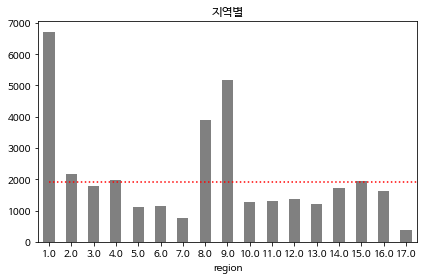

In [14]:
region = df.groupby('region').size()

region.plot(color='grey', kind='bar', rot=0)
plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')
plt.title("지역별")
plt.tight_layout()

환자 수가 많은 지역: 서울>경기>세종>부산>인천

In [15]:
df[df['region']==9]['occp'].value_counts() #경기도 직업 유형

7.0    2119
1.0     692
3.0     589
5.0     561
2.0     556
6.0     485
4.0     179
Name: occp, dtype: int64

서울 : 무직 > 관리자 > 사무직 > 서비스업 

#나이에 따른 신체/질병 관련 특성'

연령: 30대부터 80대까지 

In [17]:
print("나이 평균",df['age'].mean())
print("최소값",df['age'].min())
print("최대값",df['age'].max())

나이 평균 55.918353027028544
최소값 30.0
최대값 80.0


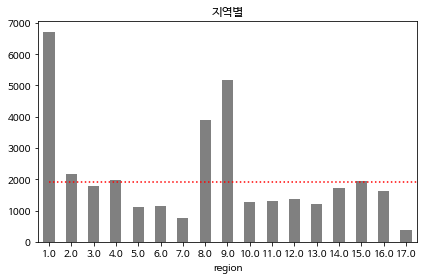

In [18]:
df.groupby('region').size()

region.plot(color='grey', kind='bar', rot=0)
plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')
plt.title("지역별")
plt.tight_layout()

In [19]:
df.loc[(df['age']<40)&(df['age']>=30), 'age']=1
df.loc[(df['age']<50)&(df['age']>=40), 'age']=2
df.loc[(df['age']<60)&(df['age']>=50), 'age']=3
df.loc[(df['age']<70)&(df['age']>=60), 'age']=4
df.loc[(df['age']<=80)&(df['age']>=70), 'age']=5

In [20]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    thirty = df[df['age']==1][feature].value_counts()
    fourty = df[df['age']==2][feature].value_counts()
    fifty = df[df['age']==3][feature].value_counts()
    sixty = df[df['age']==4][feature].value_counts()
    seventy = df[df['age']==5][feature].value_counts()
    data = pd.DataFrame([thirty, fourty, fifty, sixty, seventy])
    data.index = ['thirty', 'fourty', 'fifty', 'sixty', 'seventy']
    data.plot(kind='bar',stacked=True)

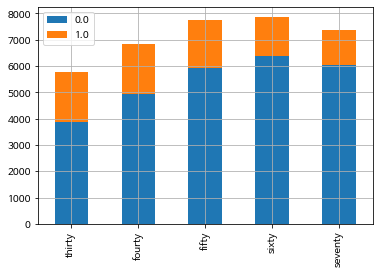

In [21]:
bar_chart('mh_stress')

60대,50대 스트레스 인지율이 더 높지만 상대적으로 스트레스를 더 많이 받는 연령대는 30,40,50대입니다.

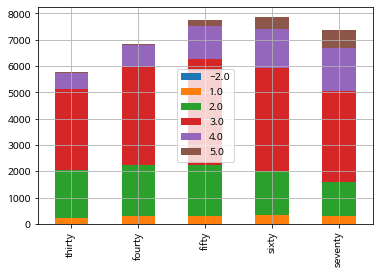

In [22]:
bar_chart('D_1_1') #주관적 건강인지

60대 이후로 건강이 나쁘다고 인지한 비율이 높음       
50대부터 건강이 안좋다는 주관적 인지가 늘어나고 있음

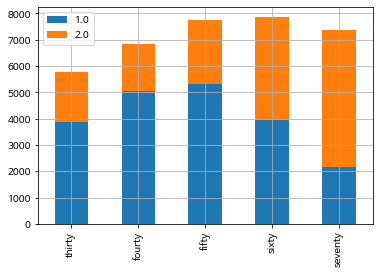

In [23]:
bar_chart('EC1_1')

50대까지는 취업자 비율이 높음

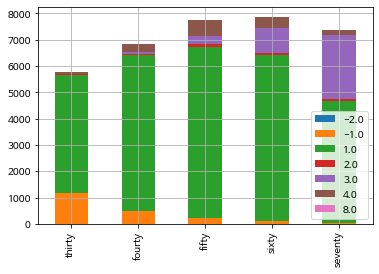

In [24]:
bar_chart('marri_2') #결혼상태

70대부터 사별비율이 높아지면서 배우자 비율은 줄었음.

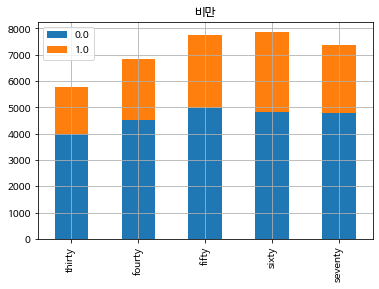

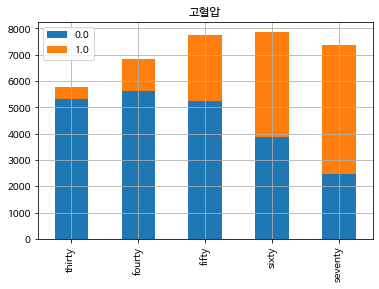

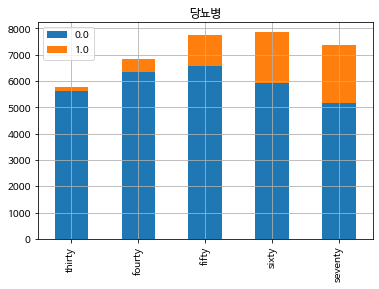

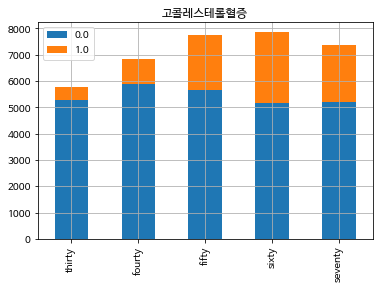

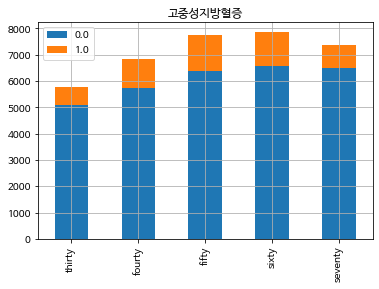

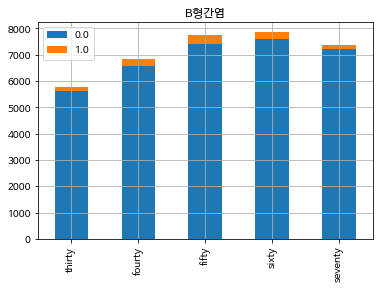

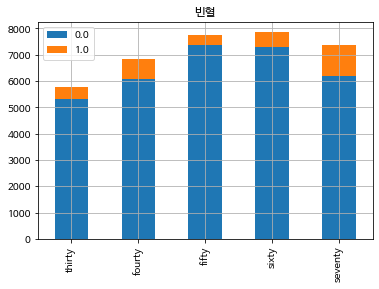

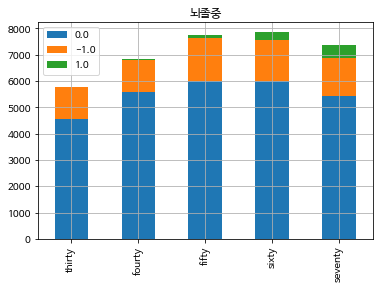

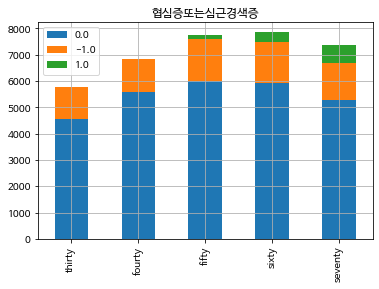

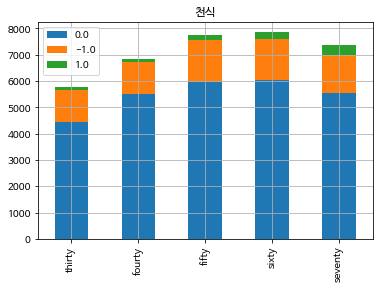

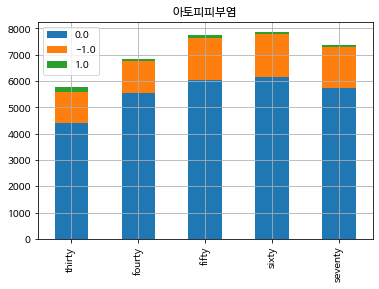

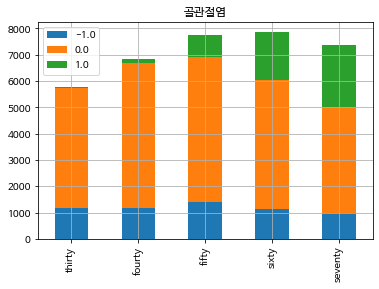

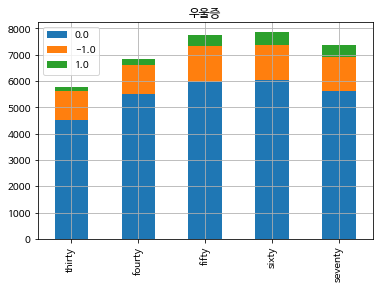

In [25]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
for i in range(len(disease)):
  bar_chart(disease[i])
  plt.title(disease[i])

#성별에 따른 신체/질병 관련 특성

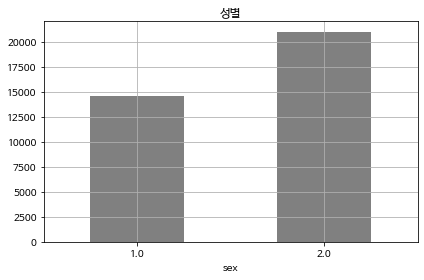

In [26]:
sex = df.groupby('sex').size()

sex.plot(color='grey', kind='bar', rot=0)
plt.title("성별")
plt.tight_layout()

In [27]:
men = df[df['sex']==1]['sex']
men.value_counts()

1.0    14620
Name: sex, dtype: int64

In [28]:
men = df[df['sex']==1]['year']
men.value_counts()

2019.0    1527
2011.0    1465
2018.0    1458
2017.0    1451
2021.0    1352
2012.0    1337
2016.0    1258
2020.0    1171
2013.0    1166
2015.0    1131
2014.0    1098
2010.0     206
Name: year, dtype: int64

In [29]:
women = df[df['sex']==2]['year']
women.value_counts()

2019.0    2149
2011.0    2146
2018.0    2107
2017.0    2014
2012.0    1994
2016.0    1910
2021.0    1909
2013.0    1714
2020.0    1644
2014.0    1624
2015.0    1615
2010.0     183
Name: year, dtype: int64

남성과 여성의 차이:
2021년에는 남성들의 발병률이 여성보다 높았음

In [30]:
men.value_counts().index

Float64Index([2019.0, 2011.0, 2018.0, 2017.0, 2021.0, 2012.0, 2016.0, 2020.0,
              2013.0, 2015.0, 2014.0, 2010.0],
             dtype='float64')

In [31]:
df.groupby('우울증').size()

우울증
-1.0     6162
 0.0    27692
 1.0     1775
dtype: int64

In [32]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    men = df[df['sex']==1][feature].value_counts()
    women = df[df['sex']==2][feature].value_counts()
    data = pd.DataFrame([men, women])
    data.index = ['men','women']
    data.plot(kind='bar',stacked=True)

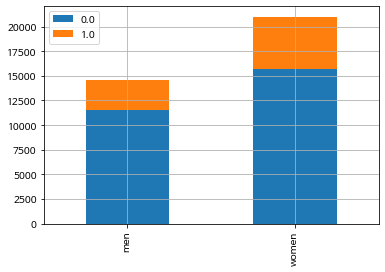

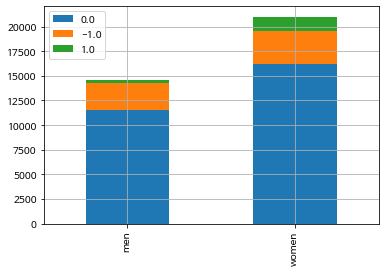

In [33]:
bar_chart('mh_stress')
bar_chart('우울증')

여성이 남성보다 스트레스 인지율, 우울증이 더 높습니다.

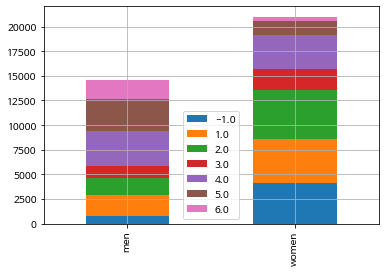

In [34]:
bar_chart('BD1_11') #일년간 음주빈도

주 3,4회 이상 마시는 비율은 남성이 더 높습니다.

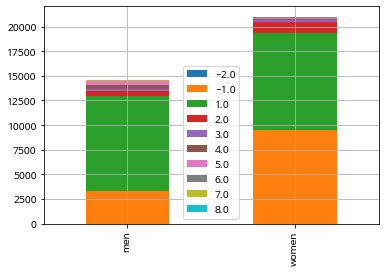

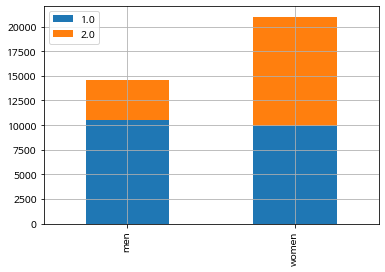

In [35]:
bar_chart('EC_wht_5')
bar_chart('EC1_1')

비경제활동, 실업자인 여성이 더 많음